<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1c2NOMFBvEJnrwEHkJKttmXGE2NE7a1RP" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Lectura de imagen y mostrar una parte con un zoom

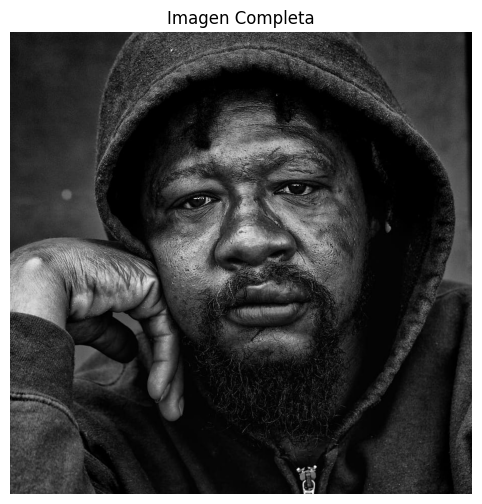

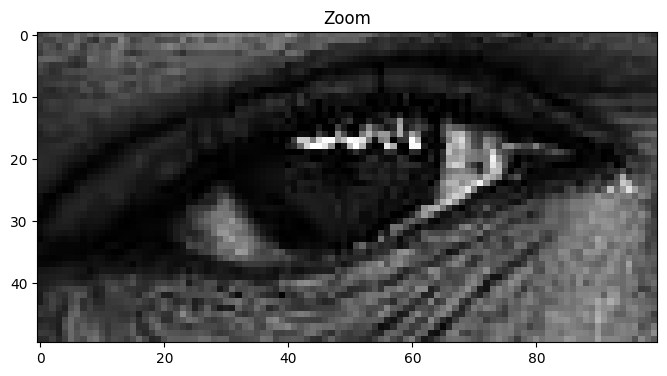

In [2]:
# prompt: Genera el python el código para leer una imagen desde una url, mostrarla por completo con un tamaño limitado y mostrar un "zoom" de una región específica en donde se puedan ver los pixels.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
'''
import requests
from io import BytesIO

# URL de la imagen (Autor: Leroy_Skalstad (pixabay). )
url = "https://raw.githubusercontent.com/FranPuentes/iTI2025/main/data/buenaresolución.png"

# Obtener la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
'''
img = Image.open('data/buenaresolucion.png')

# Mostrar la imagen completa con un tamaño limitado
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Imagen Completa")
plt.axis('off')
plt.show()

# Definir la región para el zoom
x1, y1 = 320, 310;
ix, iy = 100, 50;
zoom = img.crop((x1, y1, x1+ix, y1+iy))

# Mostrar el zoom con los píxeles visibles
plt.figure(figsize=(8, 6))
plt.imshow(zoom)
plt.title("Zoom")
plt.show()


## Histograma de una imagen

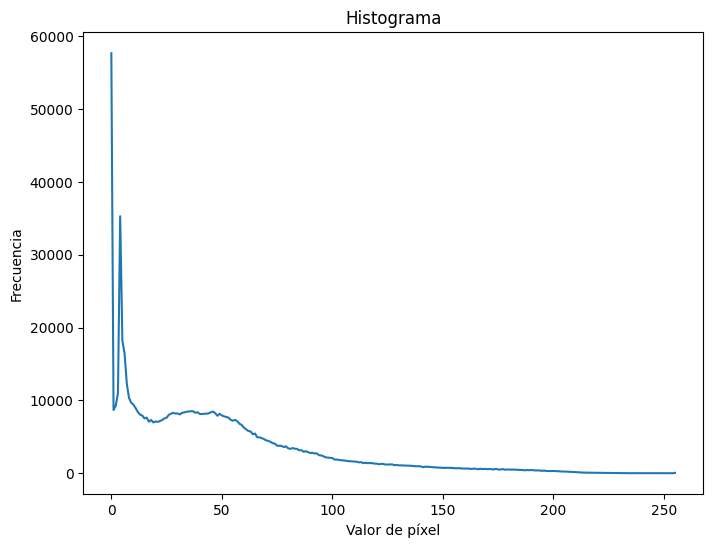

In [6]:
# prompt: Dada una imagen dada con una url, calcula y muestra su histograma. La gráfica ha de ser sólo una línea.

import matplotlib.pyplot as plt
'''
# URL de la imagen (Autor: Leroy_Skalstad (pixabay). )
url = "https://raw.githubusercontent.com/FranPuentes/iTI2025/main/data/buenaresolución.png"

# Obtener la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
'''
img = Image.open('data/buenaresolucion.png')

# Convertir la imagen a escala de grises
img_gray = img.convert('L')

# Calcular el histograma
hist = img_gray.histogram()

# Mostrar el histograma
plt.figure(figsize=(8, 6))
plt.plot(hist)
plt.title("Histograma")
plt.xlabel("Valor de píxel")
plt.ylabel("Frecuencia")
plt.show()


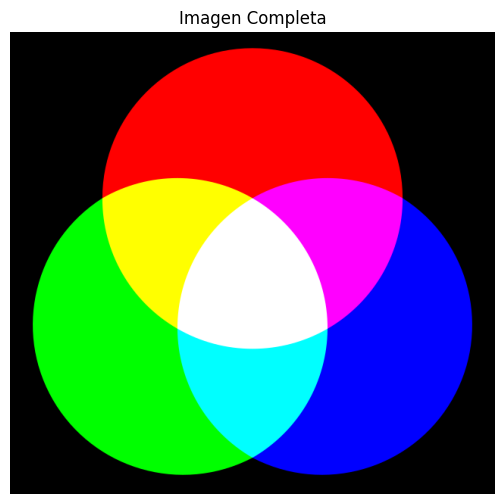

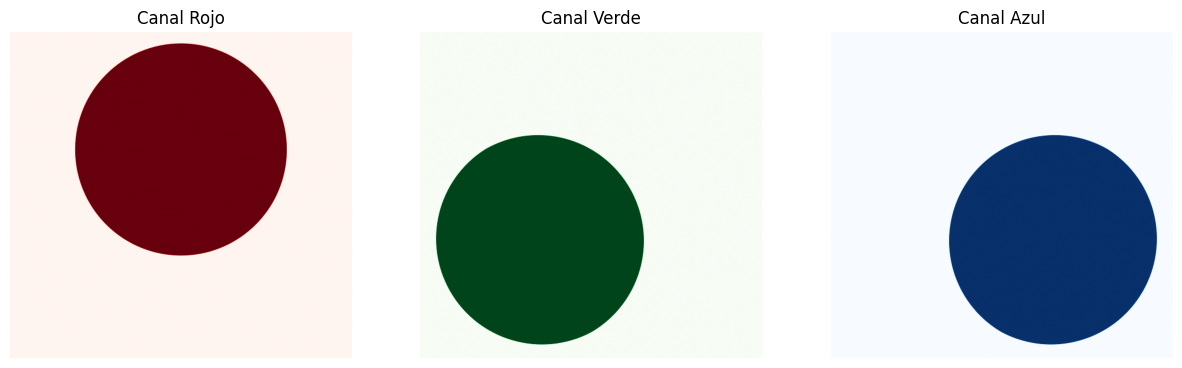

In [7]:
# prompt: Dada una imagen obtenida de una url, leerla y mostrarla, separar los canales RGB y mostrarlos en una fila. A cada imagen, dale el tono que le corresponde.

import matplotlib.pyplot as plt
'''
# URL de la imagen (Autor: Leroy_Skalstad (pixabay). )
url = "https://raw.githubusercontent.com/FranPuentes/iTI2025/main/data/rgb.png"

# Obtener la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
'''
img = Image.open('data/rgb.png')
img = img.convert('RGB')

# Mostrar la imagen completa con un tamaño limitado
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Imagen Completa")
plt.axis('off')
plt.show()

# Separar los canales RGB
r, g, b = img.split()

# Crear una figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mostrar cada canal con su respectivo tono
axes[0].imshow(r, cmap='Reds')
axes[0].set_title("Canal Rojo")
axes[0].axis('off')

axes[1].imshow(g, cmap='Greens')
axes[1].set_title("Canal Verde")
axes[1].axis('off')

axes[2].imshow(b, cmap='Blues')
axes[2].set_title("Canal Azul")
axes[2].axis('off')

plt.show()


## Convolución: detección de bordes.

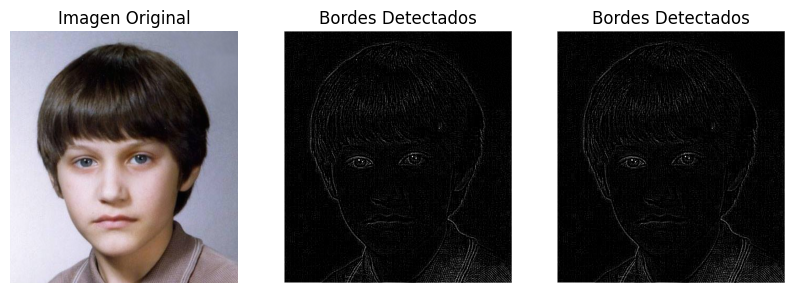

In [13]:
from PIL import ImageFilter
img = Image.open('data/joven.png')
if img.mode != "L":
    img_gray = img.convert('L')
else:
    img_gray = img
edges = img_gray.filter(ImageFilter.FIND_EDGES)
edges2 = img_gray.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,
                                               -1, -1, -1, -1), 1, 0))

# Mostrar la imagen original y la imagen con bordes detectados
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Imagen Original')

axes[1].imshow(edges, cmap=plt.cm.gray)
axes[1].set_title('Bordes Detectados')

axes[2].imshow(edges2, cmap=plt.cm.gray)
axes[2].set_title('Bordes Detectados')

for ax in axes:
  ax.axis('off')

plt.show()

Pillow provides the following set of predefined image enhancement filters:

    BLUR

    CONTOUR

    DETAIL

    EDGE_ENHANCE

    EDGE_ENHANCE_MORE

    EMBOSS

    FIND_EDGES

    SHARPEN

    SMOOTH

    SMOOTH_MORE
